<a href="https://colab.research.google.com/github/DarkStarQuantumLab/NashEquilibrium/blob/main/Example_of_no_NE_points.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matching Pennies Game 

Consider a two players two strategies game as desribe here: https://en.wikipedia.org/wiki/Matching_pennies

In [1]:
#modules installation
!python -m pip install dwave-ocean-sdk
!python -m pip install dwave-neal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from dimod import Binary, BQM, ExactSolver
import matplotlib.pyplot as plt
import dimod, re
import neal

In [6]:
#Contracting QUBO Matrix
Q = {}

bqm = BQM(Q, vartype='BINARY')

# constraints on probability
bqm.add_linear_equality_constraint(
    [('p1',1), ('p2', 1)], constant=-1, lagrange_multiplier=10
)
bqm.add_linear_equality_constraint(
    [('q1',1), ('q2', 1)],  constant=-1, lagrange_multiplier=10
)

# inequality constraints
# might be irrelevant for this problem

bqm.add_linear_inequality_constraint(
    [('q1', 1), ('q2', -1)], lb=-1, ub=1, lagrange_multiplier=1, label = 'constr1'
)
bqm.add_linear_inequality_constraint(
    [('q1', -1), ('q2', 1)], lb=-1, ub=1, lagrange_multiplier=1, label = 'constr2'
)
bqm.add_linear_inequality_constraint(
    [('p1', -1), ('p2', 1)], lb=-1, ub=1, lagrange_multiplier=1, label = 'constr3'
)
bqm.add_linear_inequality_constraint(
    [('p1', 1), ('p2', -1)], lb=-1, ub=1, lagrange_multiplier=1, label = 'constr4'
)

sampler = neal.SimulatedAnnealingSampler()
sampleset = sampler.sample(bqm, num_reads=10000)
sampleset.lowest()

/usr/local/lib/python3.7/dist-packages/dimod/binary/binary_quadratic_model.py:765: UserWarning: Did not add constraint constr1. This constraint is feasible with any value for state variables.
  f'Did not add constraint {label}.'
/usr/local/lib/python3.7/dist-packages/dimod/binary/binary_quadratic_model.py:765: UserWarning: Did not add constraint constr2. This constraint is feasible with any value for state variables.
  f'Did not add constraint {label}.'
/usr/local/lib/python3.7/dist-packages/dimod/binary/binary_quadratic_model.py:765: UserWarning: Did not add constraint constr3. This constraint is feasible with any value for state variables.
  f'Did not add constraint {label}.'
/usr/local/lib/python3.7/dist-packages/dimod/binary/binary_quadratic_model.py:765: UserWarning: Did not add constraint constr4. This constraint is feasible with any value for state variables.
  f'Did not add constraint {label}.'


SampleSet(rec.array([([0, 1, 1, 0], 0., 1), ([1, 0, 1, 0], 0., 1),
           ([1, 0, 1, 0], 0., 1), ..., ([0, 1, 1, 0], 0., 1),
           ([1, 0, 1, 0], 0., 1), ([1, 0, 0, 1], 0., 1)],
          dtype=[('sample', 'i1', (4,)), ('energy', '<f8'), ('num_occurrences', '<i8')]), Variables(['p1', 'p2', 'q1', 'q2']), {'beta_range': [0.13862943611198905, 0.9210340371976183], 'beta_schedule_type': 'geometric'}, 'BINARY')

In [7]:
sampleset.lowest()

SampleSet(rec.array([([0, 1, 1, 0], 0., 1), ([1, 0, 1, 0], 0., 1),
           ([1, 0, 1, 0], 0., 1), ..., ([0, 1, 1, 0], 0., 1),
           ([1, 0, 1, 0], 0., 1), ([1, 0, 0, 1], 0., 1)],
          dtype=[('sample', 'i1', (4,)), ('energy', '<f8'), ('num_occurrences', '<i8')]), Variables(['p1', 'p2', 'q1', 'q2']), {'beta_range': [0.13862943611198905, 0.9210340371976183], 'beta_schedule_type': 'geometric'}, 'BINARY')

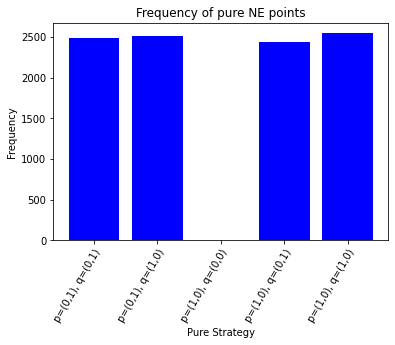

In [9]:
# plot results

def plot_sampleset(sampleset):
    '''Plots results of sampling in a bar style.
        Arg: sampleset: a set of samples prodused by DWave's sampler
    '''
        
    keep_vars =['p1', 'p2', 'q1', 'q2']
    sampleset = dimod.keep_variables(sampleset, keep_vars)
    sampleset = sampleset.aggregate()

    df = sampleset.to_pandas_dataframe()

    strategies = {}
    for i, row in df.iterrows():
        strategy = str(df['p1'][i])+str(df['p2'][i])+str(df['q1'][i])+str(df['q2'][i])
        if len((re.findall('1', strategy))) <=2:
            strategies[strategy]=row['num_occurrences']
    
    myList = strategies.items()
    myList = [('p=(' + item[0][:1]+','+ item[0][1:2]+'), q=('+item[0][2:3]+','+ item[0][3:] +')', item[1]) for item in myList]
    myList = sorted(myList) 
    x, y = zip(*myList) 

    plt.bar(x,y, color='Blue')
    plt.title('Frequency of pure NE points')
    plt.xticks(rotation = 60, horizontalalignment="right", rotation_mode="anchor") # Rotates X-Axis Ticks by 60-degrees
    plt.xlabel('Pure Strategy')
    plt.ylabel('Frequency')
    plt.savefig('Frequency_2strategies.png', dpi=600)
    plt.show()


plot_sampleset(sampleset=sampleset)